In [7]:
from sklearn.decomposition import PCA
import pickle
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image

data = np.load('./data/data_100_100.npz')

data.files
X = data['arr_0']
y = data['arr_1']
print(X.shape)
print(y.shape)

# eigne image
X1 = X - X.mean(axis=0)

pca = PCA(n_components=None, whiten=True, svd_solver='auto')
x_pca = pca.fit_transform(X1)

eigen_ratio = pca.explained_variance_ratio_
eigen_ratio_cm = np.cumsum(eigen_ratio)

# using elbow method consider numebbr of components is betwen 25-30
pca_50 = PCA(n_components=50, whiten=True, svd_solver='auto')
x_pca_50 = pca_50.fit_transform(X1)


(5670, 10000)
(5670,)


In [8]:
import pickle 


In [9]:
pickle.dump(pca_50,open('./model/pca_50.pickle','wb'))

In [10]:
x_pca_inv = pca_50.inverse_transform(x_pca_50)

In [11]:
x_pca_inv.shape

(5670, 10000)

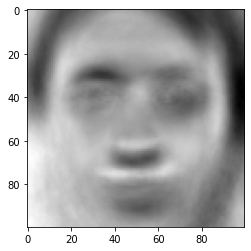

In [15]:
#consider one image
eig_img= x_pca_inv[0,:]
eig_img = eig_img.reshape((100,100))
plt.imshow(eig_img,cmap='gray')

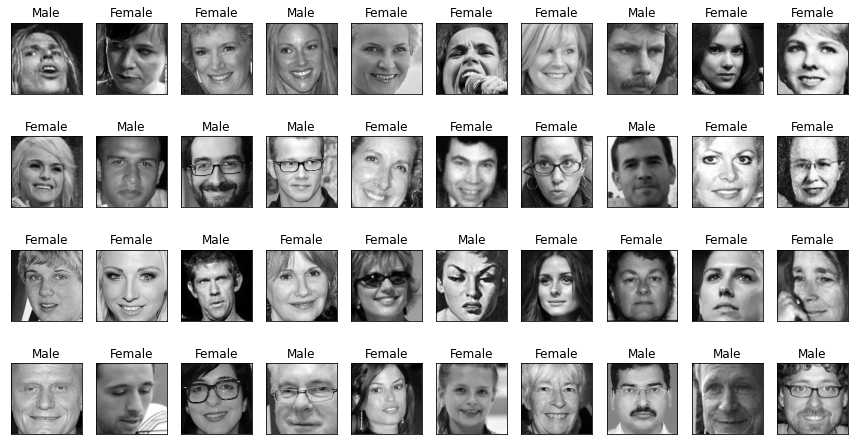

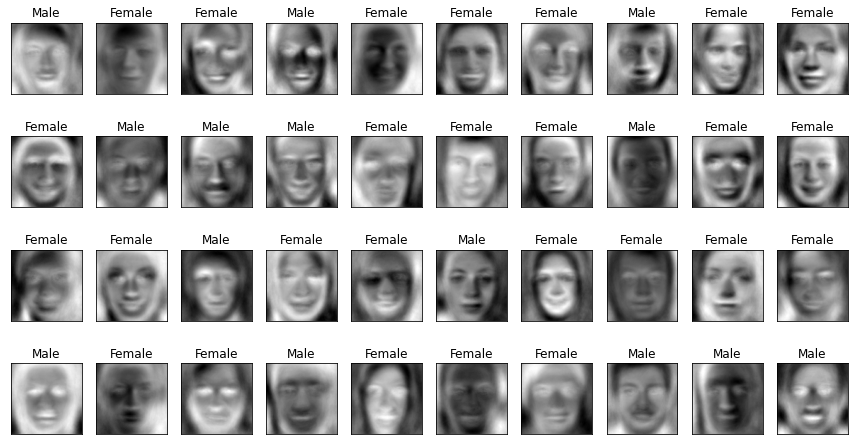

In [18]:
def label(y):
    if y == 0:
        return 'Male'
    else:
        return 'Female'
    
np.random.randint(1001)
pics = np.random.randint(90,5451,40)
plt.figure(figsize=(15,8))
for i,pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = X[pic:pic+1].reshape(100,100)
    plt.imshow(img,cmap='gray')
    plt.title('{}'.format(label(y[pic])))
    plt.xticks([])
    plt.yticks([])
plt.show()

plt.figure(figsize=(15,8))
for i,pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = x_pca_inv[pic:pic+1].reshape(100,100)
    plt.imshow(img,cmap='gray')
    plt.title('{}'.format(label(y[pic])))
    plt.xticks([])
    plt.yticks([])
plt.show()



In [20]:
np.savez('./data/data_pca_50_y_mean.pickle',x_pca_50,y,X.mean())